## Importing all the necessary Libraries

In [ ]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [ ]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet

In [ ]:
 #Initializing Plotly
import plotly.io as pio
pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [ ]:
df= pd.read_csv("AMZN.csv")

In [ ]:
#read_csv function from pandas

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-14,167.341507,169.250000,166.774994,169.193497,169.193497,51394000
1,2021-06-15,169.199997,169.849503,168.155502,169.156494,169.156494,48524000
2,2021-06-16,169.600006,171.317505,168.026505,170.762497,170.762497,84056000
3,2021-06-17,170.158997,174.860001,170.050003,174.462006,174.462006,102730000
4,2021-06-18,173.999496,175.350006,173.685501,174.345001,174.345001,104954000
...,...,...,...,...,...,...,...
247,2022-06-06,125.250000,128.990005,123.809998,124.790001,124.790001,135269000
248,2022-06-07,122.010002,124.099998,120.629997,123.000000,123.000000,85156700
249,2022-06-08,122.610001,123.750000,120.750000,121.180000,121.180000,64926600
250,2022-06-09,119.989998,121.300003,116.099998,116.150002,116.150002,67029800


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,159.559184,161.537463,157.355322,159.387099,159.387099,7.325990e+07
std,19.480003,19.183941,19.885593,19.620181,19.620181,3.248753e+07
min,102.750000,105.400002,101.260002,104.099998,104.099998,3.360600e+07
25%,152.586628,154.918747,150.182129,151.966003,151.966003,5.266600e+07
50%,165.660752,166.881501,164.332245,165.248001,165.248001,6.502030e+07
75%,172.071247,173.759121,170.230244,172.241131,172.241131,8.428150e+07
max,187.199997,188.654007,184.839493,186.570496,186.570496,2.726620e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [ ]:
px.area(df, x='Date', y="Close")

In [ ]:
px.line(df, x='Date', y='Close')

In [ ]:
px.area(df, x="Date", y="Volume")

In [ ]:
px.bar(df, y = "Volume")

In [ ]:
px.box(df, y="Close")

## Data Preperation

In [ ]:
column=['Date', 'Close']
ndf =pd.DataFrame(df, columns=column)

In [ ]:
ndf

,Date,Close
0,2021-06-14,169.193497
1,2021-06-15,169.156494
2,2021-06-16,170.762497
3,2021-06-17,174.462006
4,2021-06-18,174.345001
...,...,...
247,2022-06-06,124.790001
248,2022-06-07,123.000000
249,2022-06-08,121.180000
250,2022-06-09,116.150002


In [ ]:
prophet_df =ndf.rename(columns={'Date':'ds','Close':'y'})

In [ ]:
prophet_df

,ds,y
0,2021-06-14,169.193497
1,2021-06-15,169.156494
2,2021-06-16,170.762497
3,2021-06-17,174.462006
4,2021-06-18,174.345001
...,...,...
247,2022-06-06,124.790001
248,2022-06-07,123.000000
249,2022-06-08,121.180000
250,2022-06-09,116.150002


## Creating Facebook Prophet Model

In [ ]:
m= Prophet()
m.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [ ]:
future= m.make_future_dataframe(periods=30)
forcast=m.predict(future)

In [ ]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-06-14,173.991299,163.068346,186.572862,173.991299,173.991299,0.899326,0.899326,0.899326,0.899326,0.899326,0.899326,0.0,0.0,0.0,174.890624
1,2021-06-15,173.955497,163.863363,187.662867,173.955497,173.955497,1.437782,1.437782,1.437782,1.437782,1.437782,1.437782,0.0,0.0,0.0,175.393279
2,2021-06-16,173.919695,163.699278,186.926473,173.919695,173.919695,1.332562,1.332562,1.332562,1.332562,1.332562,1.332562,0.0,0.0,0.0,175.252257
3,2021-06-17,173.883894,163.471713,186.564527,173.883894,173.883894,1.088091,1.088091,1.088091,1.088091,1.088091,1.088091,0.0,0.0,0.0,174.971985
4,2021-06-18,173.848092,162.861522,186.119567,173.848092,173.848092,0.298124,0.298124,0.298124,0.298124,0.298124,0.298124,0.0,0.0,0.0,174.146216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2022-07-06,97.150218,86.749427,110.110437,96.587097,97.752887,1.332562,1.332562,1.332562,1.332562,1.332562,1.332562,0.0,0.0,0.0,98.482780
278,2022-07-07,96.637272,86.706623,108.949242,96.047969,97.275224,1.088091,1.088091,1.088091,1.088091,1.088091,1.088091,0.0,0.0,0.0,97.725363
279,2022-07-08,96.124326,85.567725,107.308257,95.493344,96.808085,0.298124,0.298124,0.298124,0.298124,0.298124,0.298124,0.0,0.0,0.0,96.422450
280,2022-07-09,95.611379,81.015318,104.206994,94.913976,96.330759,-2.527942,-2.527942,-2.527942,-2.527942,-2.527942,-2.527942,0.0,0.0,0.0,93.083437


In [ ]:
px.line(forcast, x='ds', y="yhat")

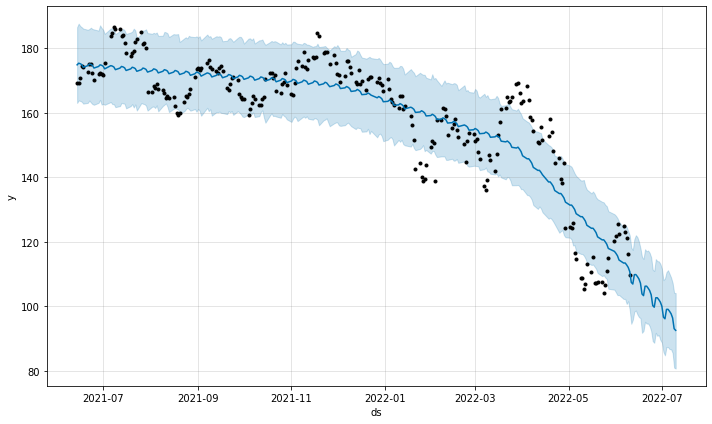

In [ ]:
figure= m.plot(forcast, xlabel='ds', ylabel='y')

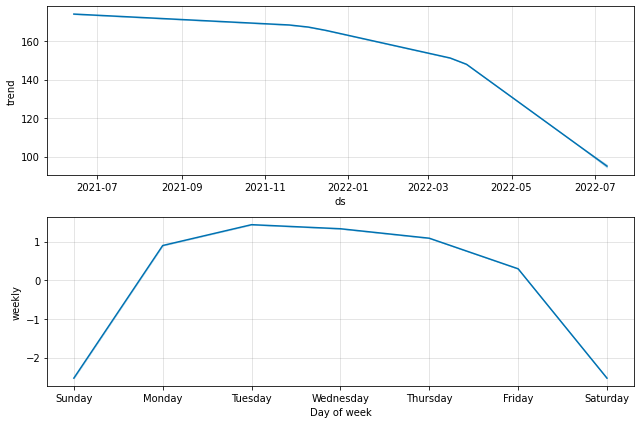

In [ ]:
figure2=m.plot_components(forcast)

##Downloading the Forecast data

In [ ]:
from google.colab import files
forcast.to_csv('forcast.csv')
files.download('forcast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>